# **Traffic YOLOv8**

![](https://imerit.net/wp-content/uploads/2023/04/Feature_Real-Time-Object-Detection-Using-YOLO.jpg)

*prageethm*

In [1]:
import os
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dataset_dir = "/kaggle/input/traffic-detection-project"
file_data = []

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        file_path = os.path.join(root, file)
        rel_path = os.path.relpath(file_path, dataset_dir)
        size_kb = os.path.getsize(file_path) / 102
        ext = os.path.splitext(file)[1] 
        file_data.append({
            "Relative Path": rel_path,
            "File Name": file,
            "Extension": ext,
            "Size (KB)": round(size_kb, 2)
        })
df_files = pd.DataFrame(file_data)
print(df_files.head(10))

                                       Relative Path  \
0                                 README.dataset.txt   
1                                README.roboflow.txt   
2                                          data.yaml   
3  valid/labels/screenshot_2385_jpg.rf.ef051a1c09...   
4  valid/labels/duque_de_caxias-2600_png_jpg.rf.9...   
5  valid/labels/ant_sales-11445_png_jpg.rf.9e55bf...   
6  valid/labels/aguanambi-3825_png_jpg.rf.151955e...   
7  valid/labels/screenshot_7602_jpg.rf.0c8ef9a4f1...   
8  valid/labels/screenshot_18050_jpg.rf.9c0f7ed83...   
9  valid/labels/ant_sales-2480_png_jpg.rf.149d02e...   

                                           File Name Extension  Size (KB)  
0                                 README.dataset.txt      .txt       1.34  
1                                README.roboflow.txt      .txt      11.95  
2                                          data.yaml     .yaml       2.85  
3  screenshot_2385_jpg.rf.ef051a1c0984d266d2c2ee8...      .txt       4.18  
4  

In [3]:
for root, dirs, files in os.walk(dataset_dir):
    level = root.replace(dataset_dir, '').count(os.sep)
    indent = '    ' * level

    print(f"{indent} {os.path.basename(root)}/")
    subindent = '    ' * (level + 1)
    for i, file in enumerate(files[:5]): 
        print(f"{subindent} {file}")
    if len(files) > 5:
        print(f"{subindent}... and {len(files) - 5} more files")

 traffic-detection-project/
     README.dataset.txt
     README.roboflow.txt
     data.yaml
     valid/
         labels/
             screenshot_2385_jpg.rf.ef051a1c0984d266d2c2ee886bdf128d.txt
             duque_de_caxias-2600_png_jpg.rf.926ce8b31c42ff519998cd7b0557ca10.txt
             ant_sales-11445_png_jpg.rf.9e55bf8d9a5a28a0f48f9810056e3eb2.txt
             aguanambi-3825_png_jpg.rf.151955e64cf0c9cacfe17a1e4ac16679.txt
             screenshot_7602_jpg.rf.0c8ef9a4f1efa21fd0805b5bb6b69406.txt
            ... and 544 more files
         images/
             ant_sales-10055_png_jpg.rf.d0b0418e8edad1bf61fa958d5153456f.jpg
             image12_png_jpg.rf.0e807f0f5cd6549b1e969bd225ebbb0c.jpg
             ant_sales-12030_png_jpg.rf.ea516ef45f0847321238c959b34f8b27.jpg
             duque_de_caxias-1580_png_jpg.rf.a10e8a1d51e831bd4a40e45b03677fd9.jpg
             aguanambi-2810_png_jpg.rf.353c291eb8b571d84c567401798842b1.jpg
            ... and 544 more files
     test/
         labels/
  

In [4]:
yaml_path = "/kaggle/input/traffic-detection-project/data.yaml"
with open(yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

print(data_yaml)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['bicycle', 'bus', 'car', 'motorbike', 'person'], 'roboflow': {'workspace': 'fsmvu', 'project': 'street-view-gdogo', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/fsmvu/street-view-gdogo/dataset/1'}}


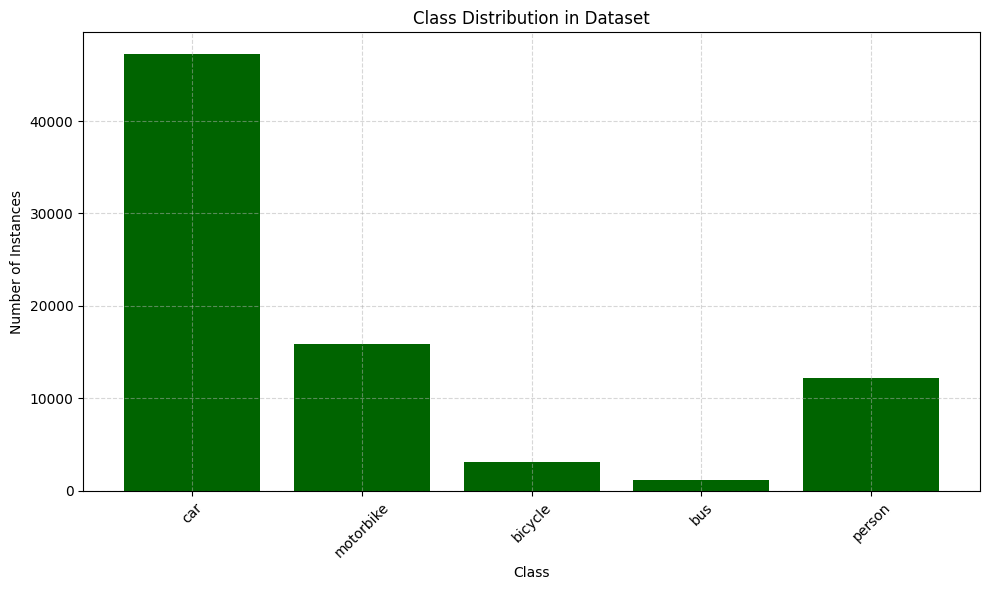

In [5]:
label_dirs = [
    "/kaggle/input/traffic-detection-project/train/labels",
    "/kaggle/input/traffic-detection-project/valid/labels",
    "/kaggle/input/traffic-detection-project/test/labels"
]
class_counts = Counter()

for label_dir in label_dirs:
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir, file), "r") as f:
                lines = f.readlines()
                for line in lines:
                    class_id = line.split()[0]
                    class_counts[int(class_id)] += 1

with open("/kaggle/input/traffic-detection-project/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

class_names = data_yaml['names']
labels = [class_names[i] for i in class_counts.keys()]
values = [class_counts[i] for i in class_counts.keys()]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='darkgreen')
plt.title("Class Distribution in Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
def list_ids(folder, extension):
    return sorted([os.path.splitext(f)[0] for f in os.listdir(folder) if f.endswith(extension)])

def check_missing(image_dir, label_dir):
    img_ids = set(list_ids(image_dir, ".jpg"))
    label_ids = set(list_ids(label_dir, ".txt"))

    missing_labels = img_ids - label_ids
    missing_images = label_ids - img_ids

    return missing_labels, missing_images
sets = ['train', 'valid', 'test']

for s in sets:
    img_dir = f"/kaggle/input/traffic-detection-project/{s}/images"
    lbl_dir = f"/kaggle/input/traffic-detection-project/{s}/labels"
    
    missing_lbls, missing_imgs = check_missing(img_dir, lbl_dir)
    
    print(f"\n--- {s.upper()} SET ---")
    print(f"Images without labels: {len(missing_lbls)}")
    if missing_lbls: print(list(missing_lbls)[:5])
    print(f"Labels without images: {len(missing_imgs)}")
    if missing_imgs: print(list(missing_imgs)[:5])


--- TRAIN SET ---
Images without labels: 0
Labels without images: 0

--- VALID SET ---
Images without labels: 0
Labels without images: 0

--- TEST SET ---
Images without labels: 0
Labels without images: 0


In [7]:
base_path = "/kaggle/input/traffic-detection-project"
subset = "train"

labels_path = os.path.join(base_path, subset, "labels")
images_path = os.path.join(base_path, subset, "images")
label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]
samples = label_files[:5]  # First 5 samples

for file in samples:
    label_path = os.path.join(labels_path, file)
    image_name = file.replace(".txt", ".jpg")
    print(f"\n📸 Image: {image_name}")
    print("📝 Bounding Boxes:")
    
    with open(label_path, 'r') as f:
        data = []
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            data.append([int(class_id), x_center, y_center, width, height])
    
    df = pd.DataFrame(data, columns=["class_id", "x_center", "y_center", "width", "height"])
    print(df)


📸 Image: aguanambi-4545_png_jpg.rf.fd4976688fbbed4d865bb4a70198d550.jpg
📝 Bounding Boxes:
    class_id  x_center  y_center     width    height
0          2  0.676562  0.769531  0.137500  0.240625
1          3  0.324219  0.413281  0.020313  0.089063
2          2  0.660937  0.446094  0.082812  0.131250
3          2  0.538281  0.330469  0.054688  0.117188
4          2  0.609375  0.279687  0.039062  0.087500
5          2  0.562500  0.209375  0.056250  0.115625
6          2  0.629687  0.211719  0.039062  0.062500
7          3  0.662500  0.289844  0.012500  0.070312
8          2  0.600781  0.167187  0.031250  0.062500
9          2  0.656250  0.133594  0.031250  0.056250
10         2  0.614062  0.096094  0.045312  0.089063
11         2  0.674219  0.080469  0.026562  0.054688
12         2  0.645312  0.062500  0.020313  0.039062
13         2  0.651563  0.035937  0.020313  0.031250
14         2  0.808594  0.100781  0.026562  0.039062
15         3  0.814063  0.110937  0.009375  0.040625
16      

In [8]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00:00:0100:01


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')  

model.train(
    data="/kaggle/input/traffic-detection-project/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    patience=10,
    workers=2,
    project="traffic_detection",
    name="yolov8n_results",
    exist_ok=True
)

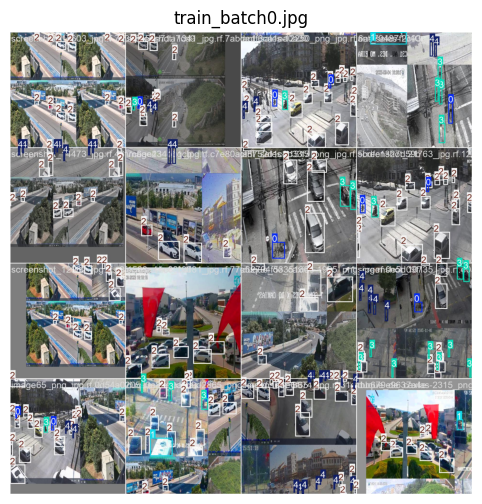

Showing: train_batch0.jpg


Press Enter to see the next image... 


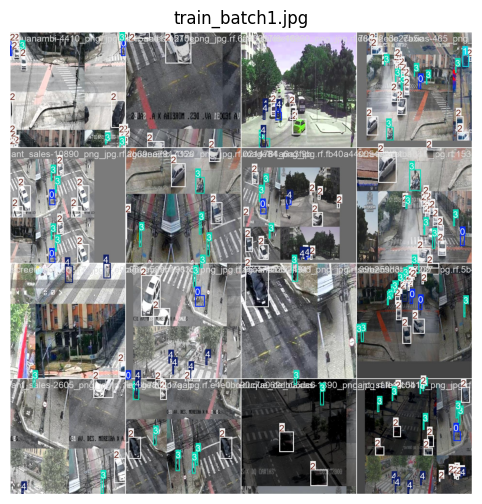

Showing: train_batch1.jpg


Press Enter to see the next image... 


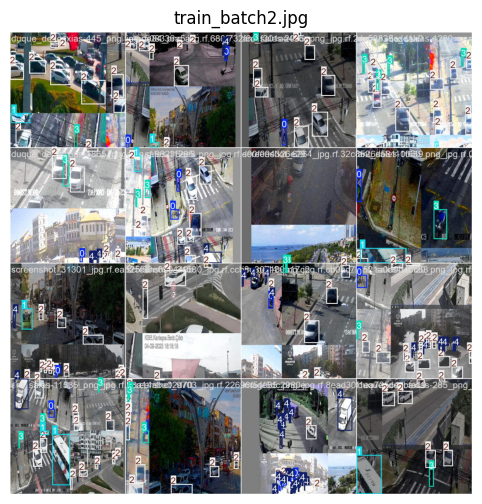

Showing: train_batch2.jpg


Press Enter to see the next image... 


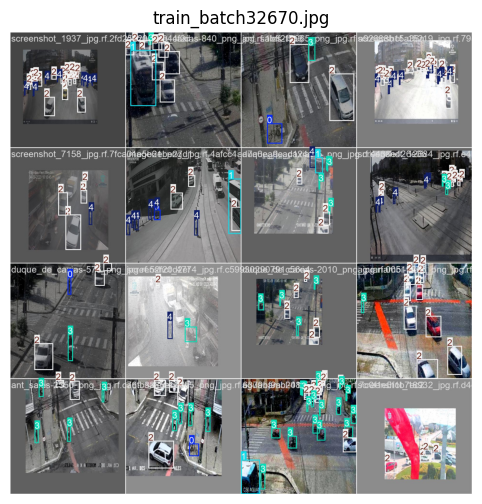

Showing: train_batch32670.jpg


Press Enter to see the next image... 


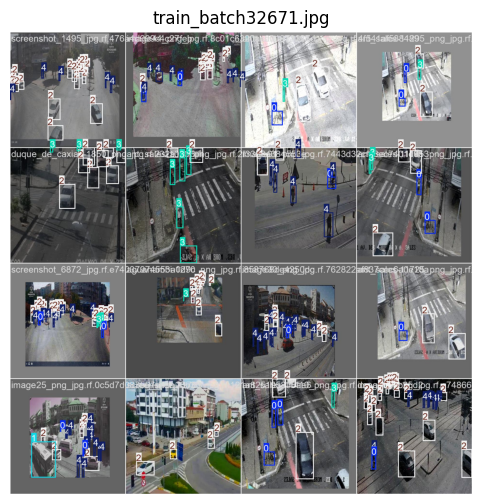

Showing: train_batch32671.jpg


Press Enter to see the next image... 


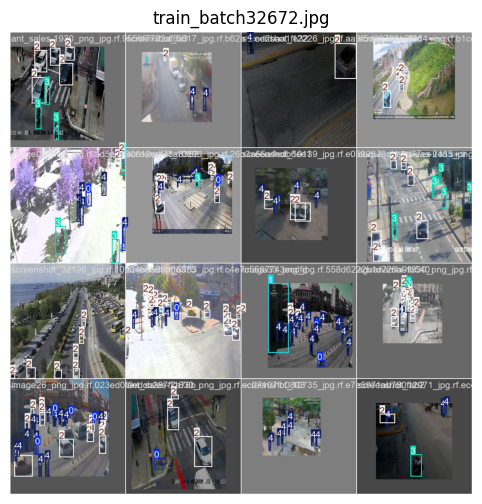

Showing: train_batch32672.jpg


Press Enter to see the next image... 


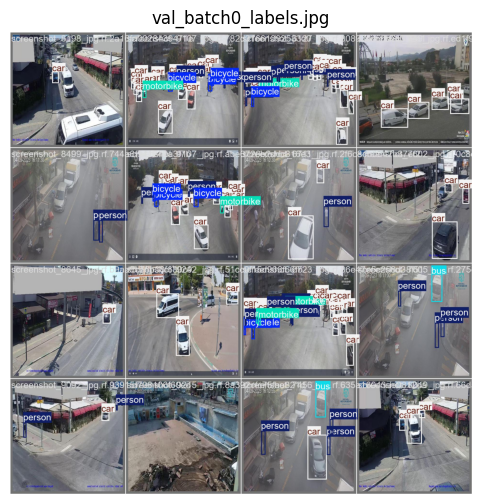

Showing: val_batch0_labels.jpg


Press Enter to see the next image... 


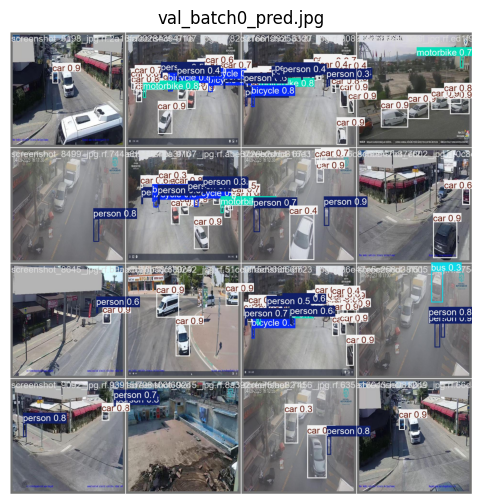

Showing: val_batch0_pred.jpg


Press Enter to see the next image... 


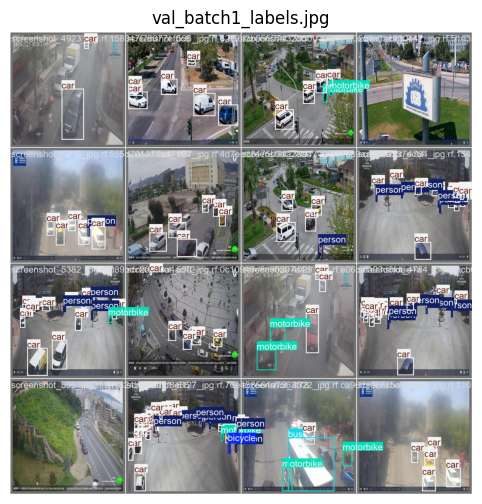

Showing: val_batch1_labels.jpg


Press Enter to see the next image... 


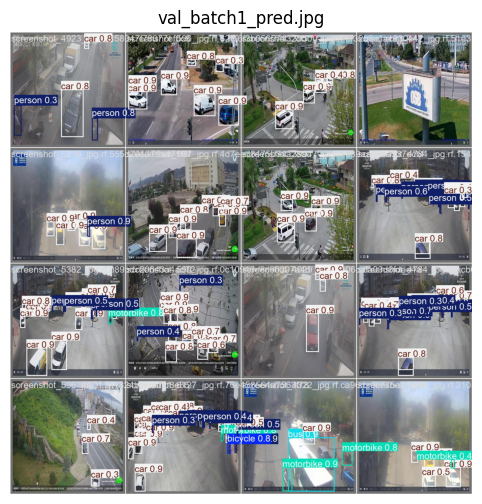

Showing: val_batch1_pred.jpg


Press Enter to see the next image... 


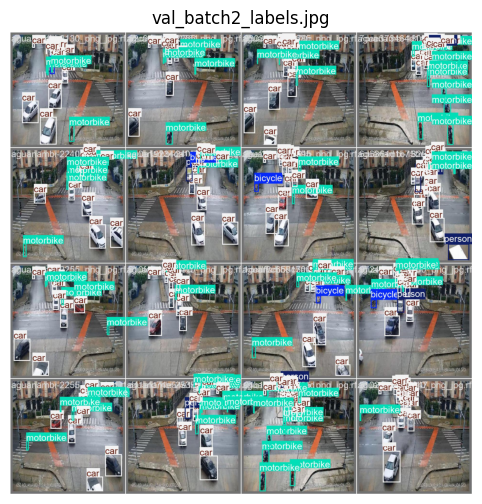

Showing: val_batch2_labels.jpg


Press Enter to see the next image... 


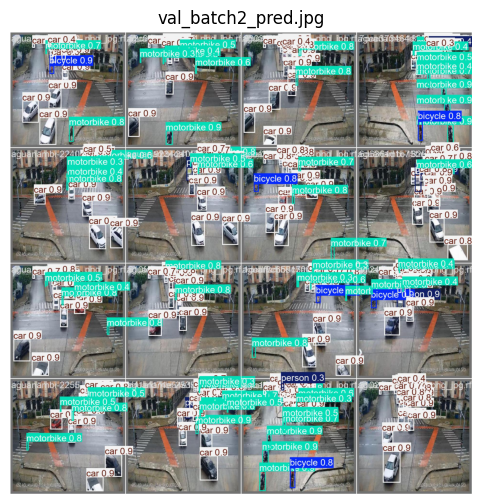

Showing: val_batch2_pred.jpg


Press Enter to see the next image... 


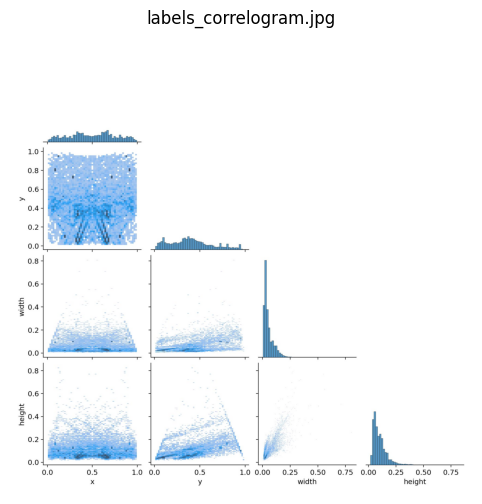

Showing: labels_correlogram.jpg


Press Enter to see the next image... 


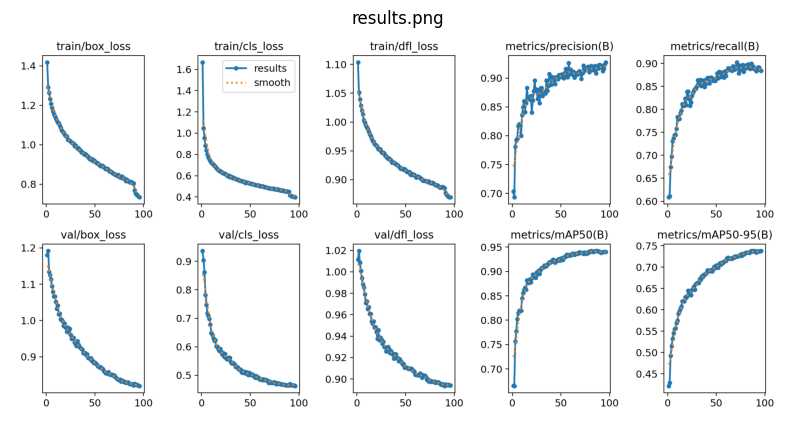

Showing: results.png


Press Enter to see the next image... 


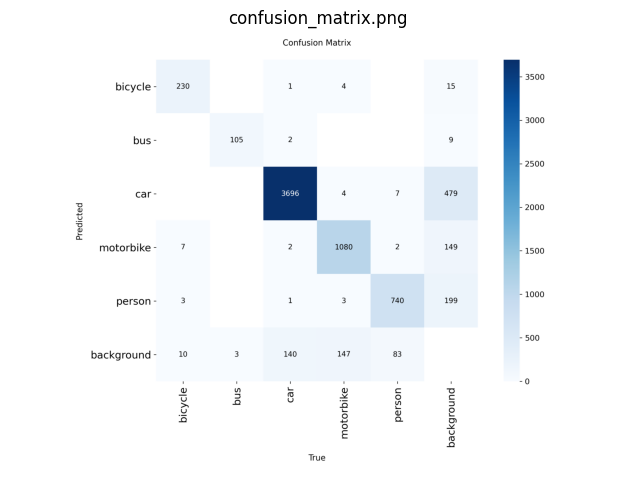

Showing: confusion_matrix.png


Press Enter to see the next image... 


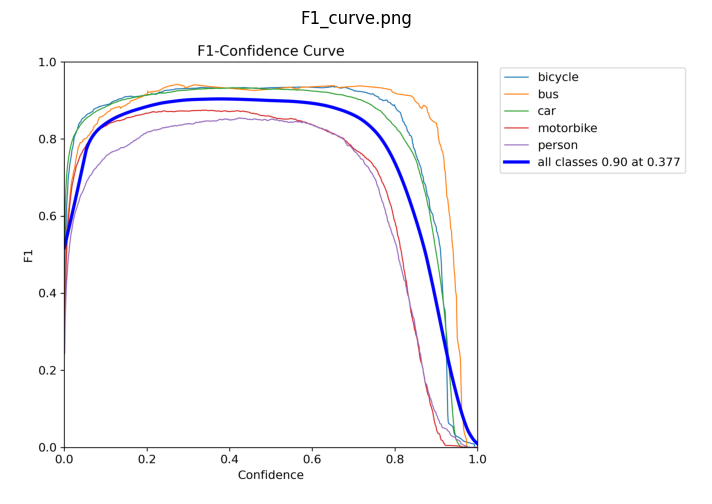

Showing: F1_curve.png


Press Enter to see the next image... 


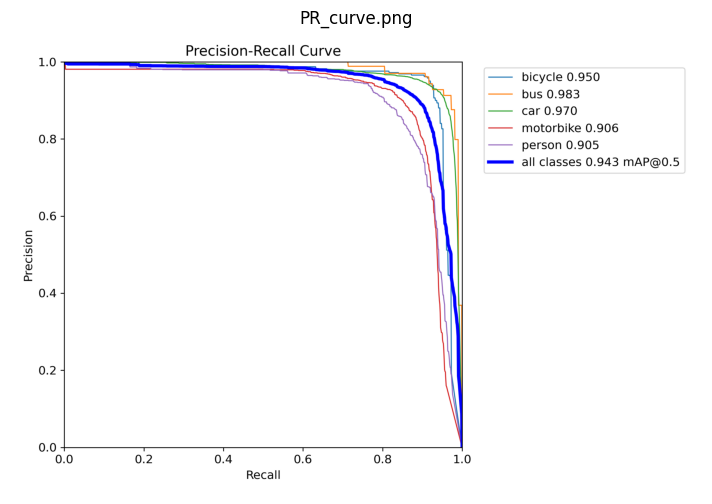

Showing: PR_curve.png


Press Enter to see the next image... 


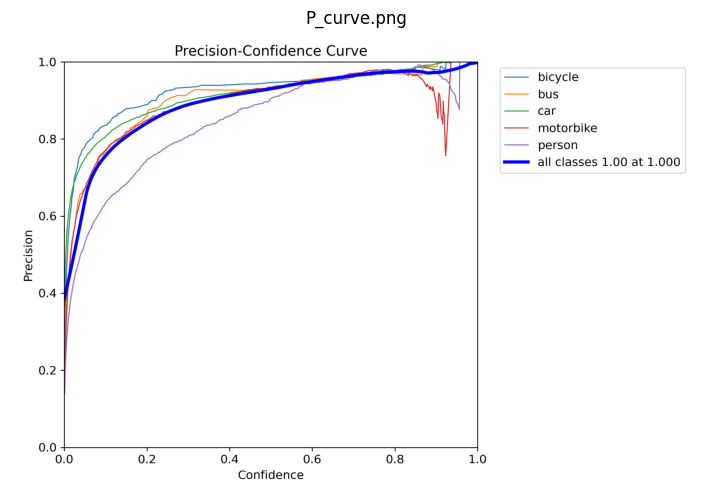

Showing: P_curve.png


Press Enter to see the next image... 


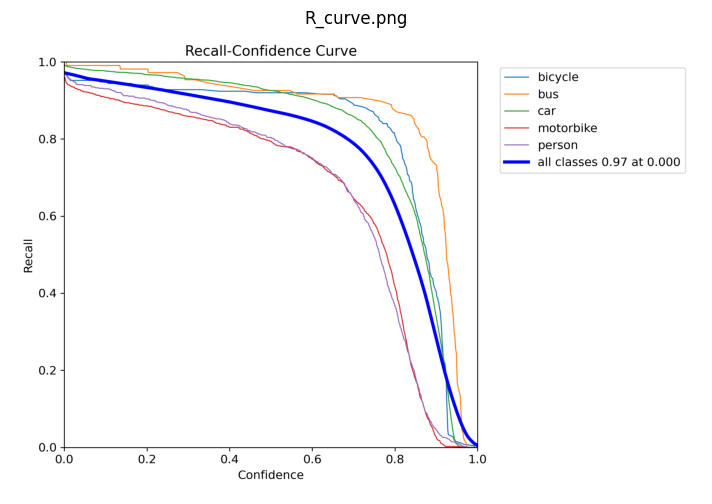

Showing: R_curve.png


Press Enter to see the next image... 


In [16]:
image_files = [
    "train_batch0.jpg",
    "train_batch1.jpg",
    "train_batch2.jpg",
    "train_batch32670.jpg",
    "train_batch32671.jpg",
    "train_batch32672.jpg",
    "val_batch0_labels.jpg",
    "val_batch0_pred.jpg",
    "val_batch1_labels.jpg",
    "val_batch1_pred.jpg",
    "val_batch2_labels.jpg",
    "val_batch2_pred.jpg",
    "labels_correlogram.jpg",
    "results.png",
    "confusion_matrix.png",
    "F1_curve.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png"
]
folder_path = "/kaggle/working/traffic_detection/yolov8n_results"

def show_images_one_by_one(images, folder):
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10,6))
            plt.title(img_name)
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.show()
            
            print(f"Showing: {img_name}")
            input("Enter") 
        else:
            print(f"File not found: {img_path}")
show_images_one_by_one(image_files, folder_path)